VÍ DỤ 1: Có nên đi chơi tennis không?



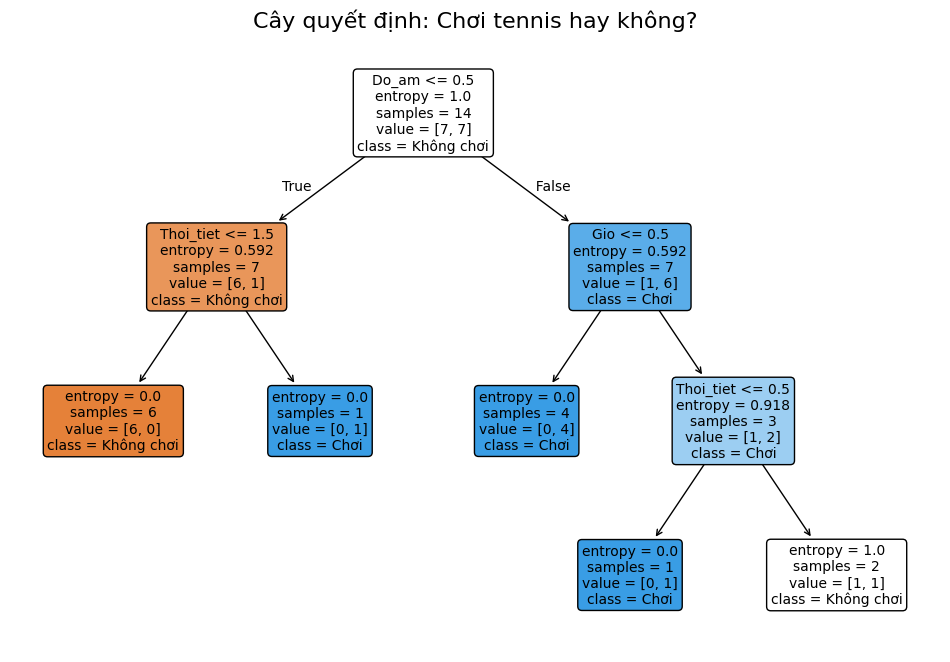

Dự đoán hôm nay (Nắng, Mát, Cao, Không gió): KHÔNG chơi tennis


VÍ DỤ 2: Phân loại trái cây



d:\CGA\miniconda\minicondaExtracted\envs\chatbot_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


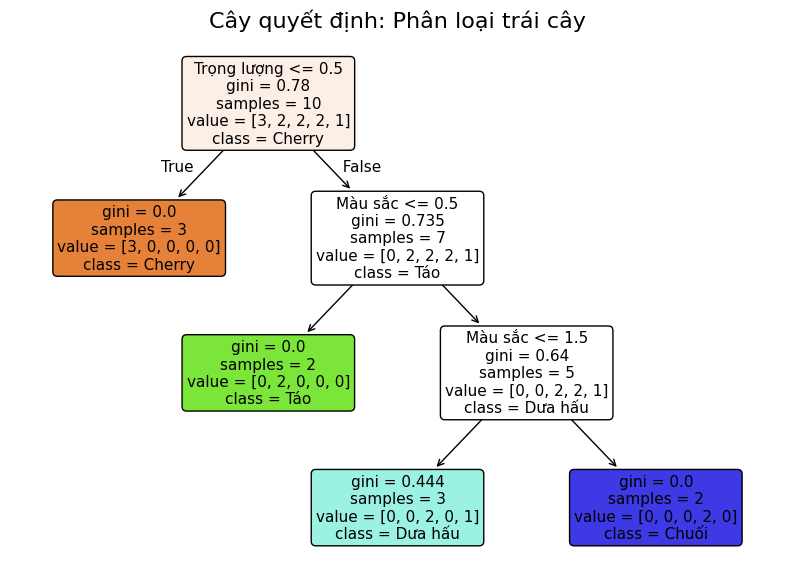

Dự đoán quả Đỏ-Nhỏ-Tròn-Nhẹ: Cherry


d:\CGA\miniconda\minicondaExtracted\envs\chatbot_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# ===================== VÍ DỤ 1: Chơi Tennis =====================
print("VÍ DỤ 1: Có nên đi chơi tennis không?\n")
tennis = pd.read_csv("tennis.csv")

# Chuyển dữ liệu dạng chữ sang số (sklearn chỉ làm việc với số)
tennis_encoded = tennis.copy()
for column in tennis_encoded.columns:
    tennis_encoded[column] = pd.factorize(tennis_encoded[column])[0]

X_tennis = tennis_encoded.drop('Choi_tennis', axis=1)
y_tennis = tennis_encoded['Choi_tennis']

# Huấn luyện cây quyết định
clf_tennis = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_tennis.fit(X_tennis, y_tennis)

# Vẽ cây
plt.figure(figsize=(12,8))
plot_tree(clf_tennis, 
          feature_names=X_tennis.columns, 
          class_names=['Không chơi', 'Chơi'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Cây quyết định: Chơi tennis hay không?", fontsize=16)
plt.show()

# Dự đoán thử một ngày mới: Nắng - Mát - Độ ẩm cao - Không gió
# → Nắng=0, Mát=2, Cao=0, Không=0
du_doan = clf_tennis.predict([[0, 2, 0, 0]])
print("Dự đoán hôm nay (Nắng, Mát, Cao, Không gió):", 
      "CÓ chơi tennis" if du_doan[0]==1 else "KHÔNG chơi tennis")


# ===================== VÍ DỤ 2: Phân loại trái cây =====================
print("\n\nVÍ DỤ 2: Phân loại trái cây\n")
fruit = pd.read_csv("fruit.csv")

fruit_encoded = fruit.copy()
for column in fruit_encoded.columns:
    fruit_encoded[column] = pd.factorize(fruit_encoded[column])[0]

X_fruit = fruit_encoded.drop('Loai_trai_cay', axis=1)
y_fruit = fruit_encoded['Loai_trai_cay']

clf_fruit = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_fruit.fit(X_fruit, y_fruit)

plt.figure(figsize=(10,7))
plot_tree(clf_fruit,
          feature_names=['Màu sắc','Kích thước','Hình dạng','Trọng lượng'],
          class_names=['Cherry','Táo','Dưa hấu','Chuối','Dưa leo'],
          filled=True,
          rounded=True,
          fontsize=11)
plt.title("Cây quyết định: Phân loại trái cây", fontsize=16)
plt.show()

# Dự đoán thử một quả: Đỏ - Nhỏ Tròn Nhẹ → Cherry
print("Dự đoán quả Đỏ-Nhỏ-Tròn-Nhẹ:", 
      ['Cherry','Táo','Dưa hấu','Chuối','Dưa leo'][clf_fruit.predict([[0,0,0,0]])[0]])